Step 1: Importing libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Ensure plots are displayed inline
%matplotlib inline

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


Step 2: Load and Inspect the Data

In [5]:
# Load the dataset
data = pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')

# Display the first few rows of the dataset
display(data.head())

# Get information about the dataset (data types, missing values, etc.)
print(data.info())


,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   Year                                                 9017 non-null   int64 
 3   Rape                                                 9017 non-null   int64 
 4   Kidnapping and Abduction                             9017 non-null   int64 
 5   Dowry Deaths                                         9017 non-null   int64 
 6   Assault on women with intent to outrage her modesty  9017 non-null   int64 
 7   Insult to modesty of Women                           9017 non-null   int64 
 8   Cruelty by Husband or his Relatives                  9017 non-null   int64 
 9

In [26]:
len(data['DISTRICT'].unique()) #count of distinct values in the 'DISTRICT' column 

808

In [25]:
data['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [24]:
len(data['STATE/UT'].unique())

35

In [29]:
victims_raped = data['Rape'].sum()
victims_kidnapped_abducted = data['Kidnapping and Abduction'].sum()
dowry_death = data['Dowry Deaths'].sum()
modesty_assault = data['Assault on women with intent to outrage her modesty'].sum()
insult_to_modesty = data['Insult to modesty of Women'].sum()
domestic_violence = data['Cruelty by Husband or his Relatives'].sum()
girls_imported = data['Importation of Girls'].sum()

In [30]:
total_population_of_victim_overall = victims_raped + victims_kidnapped_abducted + dowry_death +modesty_assault+ insult_to_modesty + domestic_violence+ girls_imported
total_population_of_victim_overall

4095096

In [38]:
data.loc[data['DISTRICT'] == 'KEONJHAR']

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
454,ODISHA,KEONJHAR,2001,38,19,4,127,16,41,0
1171,ODISHA,KEONJHAR,2002,42,23,4,157,19,25,0
1900,ODISHA,KEONJHAR,2003,37,25,14,84,17,55,0
2628,ODISHA,KEONJHAR,2004,39,14,16,87,6,15,0
3362,ODISHA,KEONJHAR,2005,36,21,12,89,15,20,0
4096,ODISHA,KEONJHAR,2006,53,32,10,152,13,20,0
4839,ODISHA,KEONJHAR,2007,41,32,21,211,10,25,0
5592,ODISHA,KEONJHAR,2008,66,46,22,203,27,34,0
6357,ODISHA,KEONJHAR,2009,53,33,20,195,16,45,0
7132,ODISHA,KEONJHAR,2010,45,32,18,107,8,85,0


Step 3: Data Cleaning

Remove Duplicates

In [7]:
# Check for and remove duplicated rows based on district and year
print(f"Number of duplicated rows before cleaning: {data.duplicated(subset=['DISTRICT', 'Year']).sum()}")

# Remove duplicates
data_cleaned = data.drop_duplicates(subset=['DISTRICT', 'Year'], keep='first')

# Check again after removing duplicates
print(f"Number of duplicated rows after cleaning: {data_cleaned.duplicated(subset=['DISTRICT', 'Year']).sum()}")


Number of duplicated rows before cleaning: 586
Number of duplicated rows after cleaning: 0


Handle Missing Values

In [31]:
# Check for missing values
missing_values = data_cleaned.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values with 0 (assuming missing means no reported incidents)
data_cleaned = data_cleaned.fillna(0)

# Verify that there are no missing values now
print("Missing values after filling:\n", data_cleaned.isnull().sum())


Missing values in each column:
 STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
Total_Crimes                                           0
dtype: int64
Missing values after filling:
 STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths

Step 4: Exploratory Data Analysis (EDA)


Summary Statistics

In [9]:
# Get summary statistics of the dataset
summary_stats = data_cleaned.describe()
display(summary_stats)


,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,8431.000000,8431.000000,8431.000000,8431.000000,8431.000000,8431.000000,8431.000000,8431.000000
mean,2006.633495,30.148855,34.036769,11.582375,59.962045,19.036295,118.139011,0.107935
std,3.463682,55.541952,81.125051,24.400461,176.526847,124.592328,424.136511,1.450560
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,8.000000,6.000000,1.000000,9.000000,0.000000,11.000000,0.000000
50%,2007.000000,19.000000,17.000000,5.000000,30.000000,2.000000,46.000000,0.000000
75%,2010.000000,39.000000,39.000000,15.000000,72.000000,12.000000,127.000000,0.000000
max,2012.000000,1442.000000,2160.000000,613.000000,5147.000000,4562.000000,13389.000000,60.000000


Total Crimes per District

In [34]:
# Calculate total crimes for each district and year
crime_columns = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
                 'Insult to modesty of Women', 'Cruelty by Husband or his Relatives', 'Importation of Girls']

data_cleaned['Total_Crimes'] = data_cleaned[crime_columns].sum(axis=1)

# Display the first few rows with total crimes included
display(data_cleaned[['STATE/UT', 'DISTRICT', 'Year', 'Total_Crimes']].head(15))




,STATE/UT,DISTRICT,Year,Total_Crimes
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
3,ANDHRA PRADESH,CUDDAPAH,2001,278
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,1
6,ANDHRA PRADESH,GUNTUR,2001,758
7,ANDHRA PRADESH,HYDERABAD CITY,2001,991
8,ANDHRA PRADESH,KARIMNAGAR,2001,886
9,ANDHRA PRADESH,KHAMMAM,2001,782


National Average of Crimes

In [15]:
# Calculate national average of total crimes across districts
national_average = data_cleaned['Total_Crimes'].mean()
print(f"National Average of Total Crimes per District: {national_average}")


National Average of Total Crimes per District: 273.0132843079113


Identify High-Crime Districts

In [16]:
# Define threshold as 20% higher than the national average
threshold = national_average * 1.20

# Identify districts with total crimes greater than 20% above the national average
high_crime_districts = data_cleaned[data_cleaned['Total_Crimes'] > threshold]

# Display the high-crime districts
display(high_crime_districts[['STATE/UT', 'DISTRICT', 'Year', 'Total_Crimes']])


,STATE/UT,DISTRICT,Year,Total_Crimes
0,ANDHRA PRADESH,ADILABAD,2001,454
1,ANDHRA PRADESH,ANANTAPUR,2001,356
2,ANDHRA PRADESH,CHITTOOR,2001,456
4,ANDHRA PRADESH,EAST GODAVARI,2001,475
6,ANDHRA PRADESH,GUNTUR,2001,758
...,...,...,...,...
9004,DELHI,NORTH-EAST,2012,737
9005,DELHI,NORTH-WEST,2012,505
9006,DELHI,OUTER,2012,740
9008,DELHI,SOUTH-EAST,2012,759


Step 5: Data Visualization


Crime Trends by Year

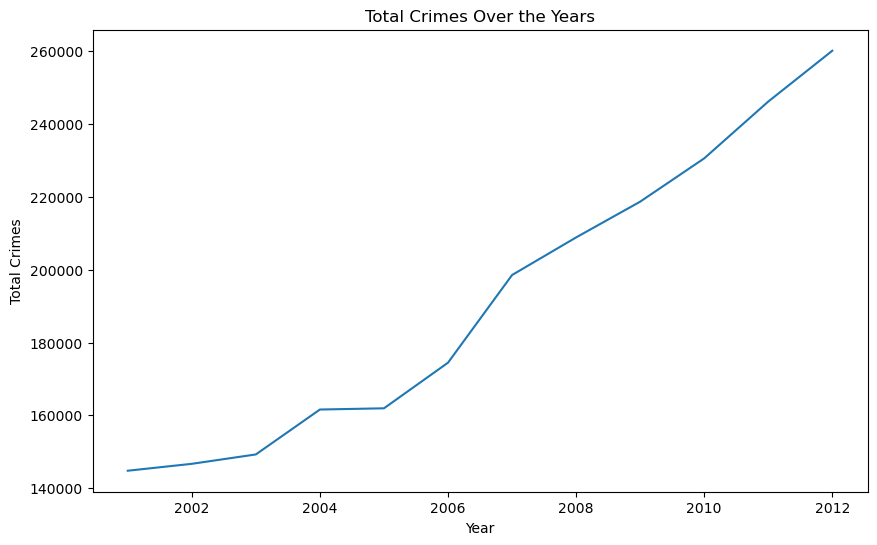

In [19]:
# Plot the total crimes over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_cleaned, x='Year', y='Total_Crimes', estimator='sum', ci=None)
plt.title('Total Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.show()



Crime Distribution by State

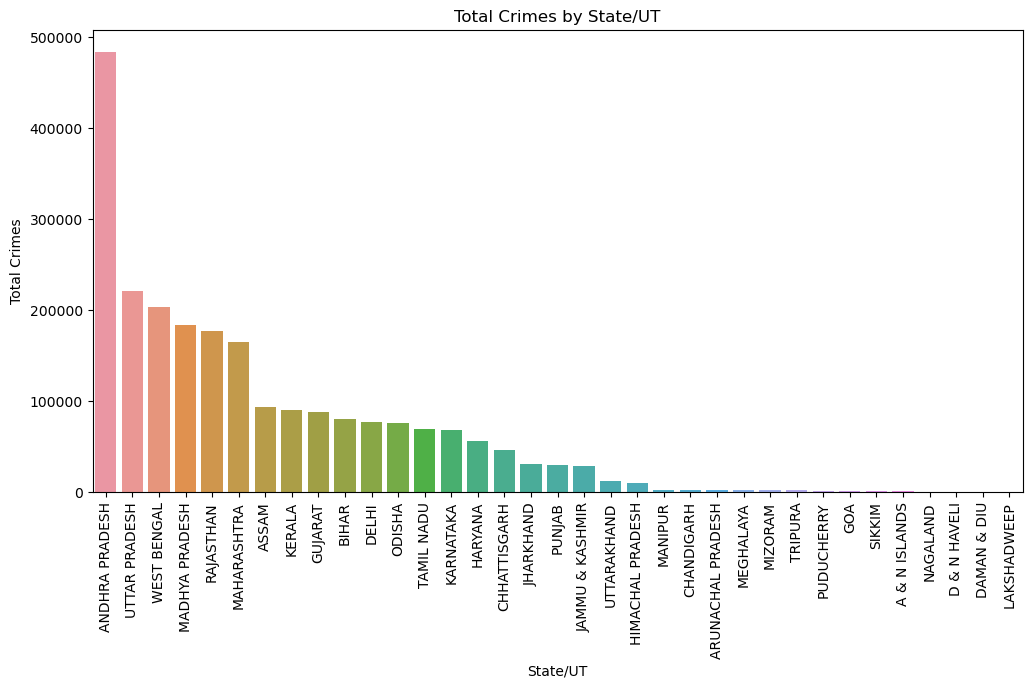

In [20]:
# Plot the total crimes by state/UT
plt.figure(figsize=(12, 6))
sns.barplot(x='STATE/UT', y='Total_Crimes', data=data_cleaned.groupby('STATE/UT')['Total_Crimes'].sum().reset_index().sort_values(by='Total_Crimes', ascending=False))
plt.xticks(rotation=90)
plt.title('Total Crimes by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Total Crimes')
plt.show()


Correlation Between Different Crimes

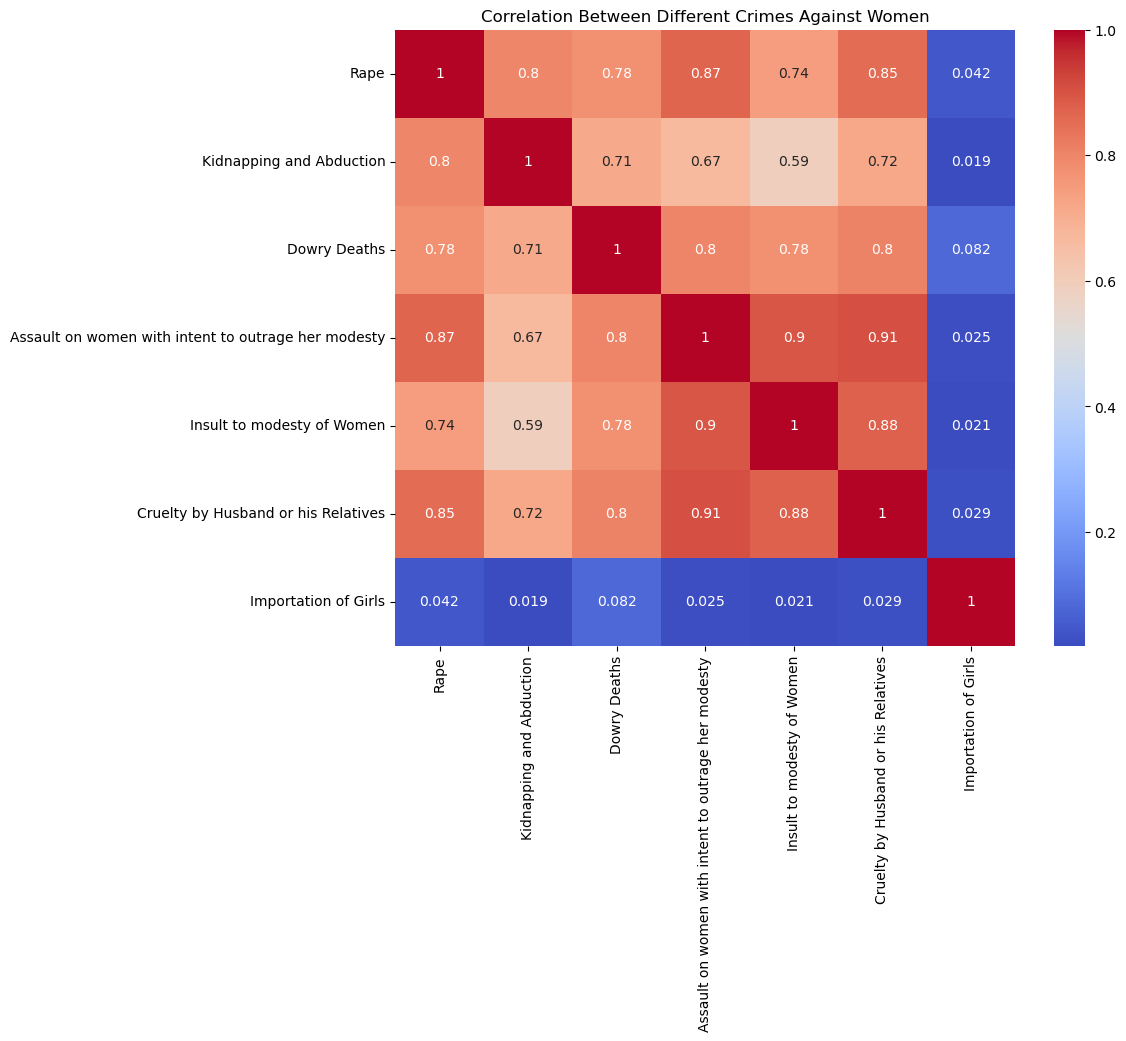

In [21]:
# Plot a heatmap showing correlations between different crime categories
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned[crime_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Different Crimes Against Women')
plt.show()


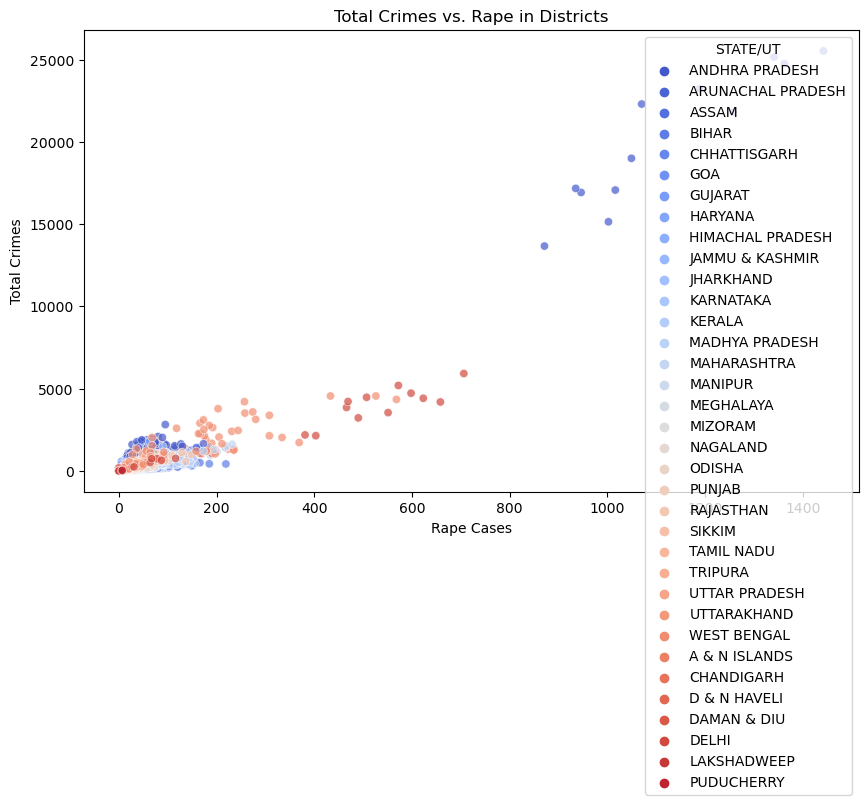

In [35]:
# Scatter plot: Total Crimes vs. Rape
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='Rape', y='Total_Crimes', hue='STATE/UT', palette='coolwarm', alpha=0.7)
plt.title('Total Crimes vs. Rape in Districts')
plt.xlabel('Rape Cases')
plt.ylabel('Total Crimes')
plt.show()


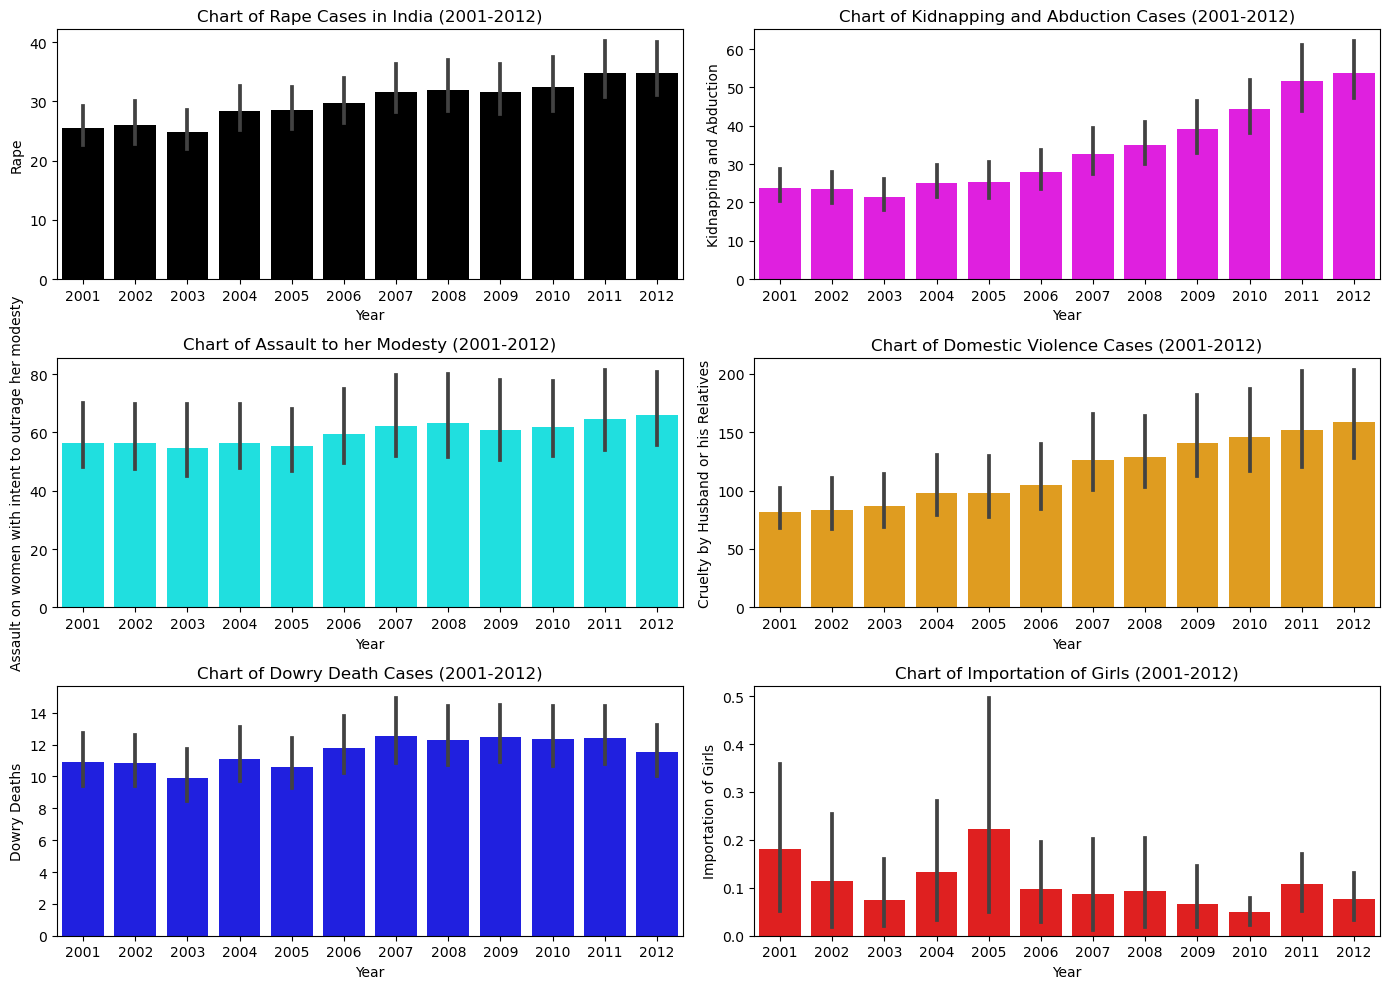

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 10))

# First plot: Rape cases
plt.subplot(3, 2, 1)  # (nrows, ncols, index)
sns.barplot(x='Year', y='Rape', data=data_cleaned, color='black')
plt.title('Chart of Rape Cases in India (2001-2012)')

# Second plot: Kidnapping and Abduction cases
plt.subplot(3, 2, 2)
sns.barplot(x='Year', y='Kidnapping and Abduction', data=data_cleaned, color='magenta')
plt.title('Chart of Kidnapping and Abduction Cases (2001-2012)')

# Third plot: Assault on Women cases
plt.subplot(3, 2, 3)
sns.barplot(x='Year', y='Assault on women with intent to outrage her modesty', data=data_cleaned, color='cyan')
plt.title('Chart of Assault to her Modesty (2001-2012)')

# Fourth plot: Domestic Violence (Cruelty by Husband)
plt.subplot(3, 2, 4)
sns.barplot(x='Year', y='Cruelty by Husband or his Relatives', data=data_cleaned, color='orange')
plt.title('Chart of Domestic Violence Cases (2001-2012)')

# Fifth plot: Dowry Deaths
plt.subplot(3, 2, 5)
sns.barplot(x='Year', y='Dowry Deaths', data=data_cleaned, color='blue')
plt.title('Chart of Dowry Death Cases (2001-2012)')

# Sixth plot: Importation of Girls
plt.subplot(3, 2, 6)
sns.barplot(x='Year', y='Importation of Girls', data=data_cleaned, color='red')
plt.title('Chart of Importation of Girls (2001-2012)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show all plots
plt.show()


Step 6: Present Key Insights

In [40]:
# Present key insights from the data analysis
print(f"The national average for total crimes is {national_average}.")
print(f"There are {len(high_crime_districts)} districts with crime rates more than 20% above the national average.")


The national average for total crimes is 273.0132843079113.
There are 1953 districts with crime rates more than 20% above the national average.
